In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy, scipy.stats

In [2]:
df=pd.read_csv('Toyota_Corolla.csv',encoding='ISO-8859-1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
print(df.shape)
print('\n')
print(df.columns)
print('\n')
print(df.info())
print('\n')
print(df.isnull().sum())

(1436, 38)


Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
Id                  1436 non-null int64
Model               1436 non-null object
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-nul

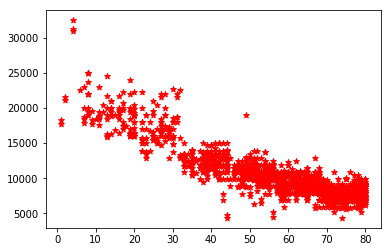

In [4]:
plt.scatter(df['Age_08_04'],df['Price'], c='red', marker='*')

#we can notice that as the age increases price decreases i.e. older models means lower prices

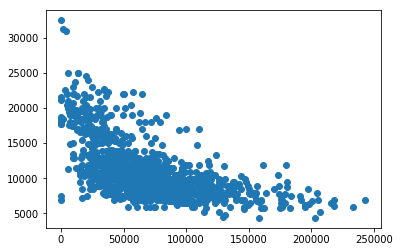

In [6]:
plt.scatter(df['KM'],df['Price'])

#More KM vehicle has traveled results in drop in the price

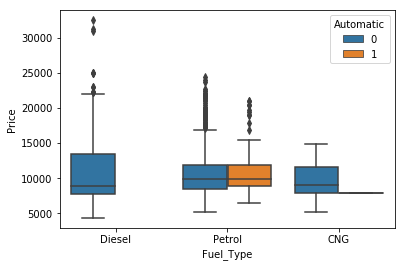

In [8]:
sns.boxplot(y='Price', x='Fuel_Type' , hue = 'Automatic', data = df)

#Diesel fuel type model does not have the automatic feature.
#On an average, Petrol fuel type model has higher price.

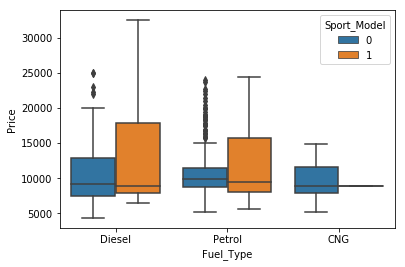

In [10]:
sns.boxplot(y='Price', x='Fuel_Type' , hue='Sport_Model', data=df)

#Sports model, on average, observed to be more costly in Petrol type.

# Handling Categorical Variables

In [12]:
dummyvar1=pd.get_dummies(df['Fuel_Type'],drop_first=True)
dummyvar2=pd.get_dummies(df['Color'],drop_first=True)
df_new=pd.concat([dummyvar1,dummyvar2,df],axis=1)
df_new.shape

(1436, 49)

In [13]:
df_new=df_new.drop(['Id','Model','Fuel_Type','Color','Mfg_Month', 'Mfg_Year'],axis=1) 
#excluding model column as each model has unique combinations of features
#excluding 'Mfg_Month', 'Mfg_Year' because those are already used to calculate 'Age_08_04'
df_new.shape

(1436, 43)

In [14]:
x=df_new.drop('Price',axis=1)
y=df_new['Price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [15]:
print(X_train.shape)
print(X_test.shape)

(1005, 42)
(431, 42)


# Decision Tree Regressor Model

In [16]:
from sklearn.tree import DecisionTreeRegressor
rg1=DecisionTreeRegressor()
rg1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [17]:
pred=rg1.predict(X_test)
print('MAPE=',np.mean(abs((y_test-pred)/y_test)*100))
from sklearn.metrics import r2_score
print('R2=',r2_score(y_test,pred))

MAPE= 10.648927930135248
R2= 0.850952275429187


In [18]:
from sklearn.model_selection import cross_val_score
depth=[]
for i in range(2,15,2):
    rg=DecisionTreeRegressor(max_depth=i)
    score=cross_val_score(estimator=rg,X=X_train,y=y_train,cv=10)
    depth.append((i,score.mean()))
print(depth)

[(2, 0.7781730638032196), (4, 0.861667042264129), (6, 0.8654730008617777), (8, 0.8539521753305536), (10, 0.8480976109092653), (12, 0.8451941152569408), (14, 0.8333974803852401)]


max_depth = 6 is optimum value

In [20]:
rg2=DecisionTreeRegressor(max_depth=6)
rg2.fit(X_train,y_train)
pred_2=rg2.predict(X_test)
print('MAPE=',np.mean(abs((y_test-pred_2)/y_test)*100))
print('R2=',r2_score(y_test,pred_2))

MAPE= 9.24066818013974
R2= 0.8807512418106498


performance of the model is improved

# Random Forest regressor model

In [22]:
from sklearn.ensemble import RandomForestRegressor
Rfr=RandomForestRegressor()

In [23]:
Rfr.fit(X_train,y_train)

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [24]:
pred_3=Rfr.predict(X_test)
print('MAPE=',np.mean(abs((y_test-pred_3)/y_test)*100))
print('R2=',r2_score(y_test,pred_3))

MAPE= 8.34320331040926
R2= 0.9174597302611204


In [25]:
#results are much better than the decision tree model

Paramater tuning

In [27]:
depth_=[]
for i in range(6,14,1):
    RF_=RandomForestRegressor(n_estimators=1500, max_depth=i)
    score_=cross_val_score(estimator=RF_,X=X_train,y=y_train,cv=10)
    depth_.append((i,score_.mean()))
print(depth_)

[(6, 0.904206471610659), (7, 0.9061823445872312), (8, 0.9077549529556282), (9, 0.9084102055143302), (10, 0.9080481907232174), (11, 0.9080174106164479), (12, 0.9080015518010937), (13, 0.9078487188227424)]


optimum value of max_depth is 9

In [29]:
Rfrnew=RandomForestRegressor(max_depth=9,n_estimators=1500)
Rfrnew.fit(X_train,y_train)
pred_new=Rfrnew.predict(X_test)
print('MAPE=',np.mean(abs((y_test-pred_new)/y_test)*100))
print('R2=',r2_score(y_test,pred_new))

MAPE= 7.999150748074602
R2= 0.9241726602256747


performance is further improved